In [5]:
!pip install numpy pandas matplotlib seaborn imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay


In [7]:
df = pd.read_csv("survey lung cancer.csv")

# <u>Lung Cancer Analysis (Project 2)</u>

## What is the problem?
Lung cancer is one of the leading causes of death worldwide. Early detection can significantly improve survival rates. The goal of this project is to build a classification model that predicts whether an individual has lung cancer based on factors such as smoking habits, symptoms, and other health-related conditions. Overall, this could help individuals that find themselves fitting some of the categories represented in the data set and hopefully change their lifestyle or understand the risks that are usually associated with eventually getting diagnosed with lung cancer.

## Questions we are trying to answer?

1. **What factor is the most likely to lead to developing lung cancer?**
2. **What factor is the least likely to lead to developing lung cancer??**
3. **Are there any unexpected patterns or relationships in the data that might provide new insights into lung cancer risk based of the gender?**

## Introducing the Data
For this project, I found a data set called utilizing the sites Kaggle. You can directly go to the dateset to view/download it by clicking <a href="https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer/data" id="url" runat="server">HERE</a>. This datset simply shows different specifications in the form of categories that are directly linked to possibly having lung cancer.
### Dateset Information: 
This dateset contains 16 columns, with a mix of categorical and numerical data: The columns in the dateset are as follows:
#### Target Variable:
Lung Cancer (Categorical)
#### Other Variables
- Gender (Categorical)
- Age (Numerical)
- Smoking (Numerical)
- Yellow Fingers (Numerical)
- Anxiety (Numerical)
-  Peer Pressure (Numerical)
-  Chronic Disease (Numerical)
-  Fatigue (Numerical)
-  Allergies (Numerical)
-  Wheezing (Numerical)
-  Alcohol Consuming (Numerical)
-  Coughing (Numerical)
-  Shortness of Breath (Numerical)
-  Swallowing Difficulty (Numerical)
-  Chest Pain (Numerical)


# <u>Pre-Processing</u>

### Displays the basic information for the data set that was previously explained above.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### Showing the first 5 rows of the data. This was done as a check to ensure that I properly read my dataset.

In [15]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### Showing the summary of statistical data for the columns that are numerical. I rounded the decimal places to 2 to make the data more easily readable.

In [17]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### Checking to see if there are any null or duplicate values in the dataset.

In [19]:
print(f'\nValues Missing: {df.isna().sum().sum()}')
print(f'Duplicate Values: {df.duplicated().sum()}')


Values Missing: 0
Duplicate Values: 33


#### There are 33 rows that have duplicates in them. I am going to drop all duplicates because there could be possible bias associated with the dataset that will give us a incorrect result in modeling.

In [21]:
df.drop_duplicates(inplace=True)

### Checking class distribution for the target variable which is Lung Cancer.
As we can see, this data set is badly imbalanced. As, we move through the steps we will do some techniques to help balance the dataset as we move into classification and modeling for this project.

In [23]:
(df["LUNG_CANCER"].value_counts())

LUNG_CANCER
YES    238
NO      38
Name: count, dtype: int64

#### I want to make sure that all my columns that have binary values (1's and 2's) to correspond to the "Yes" and "No" that my target variable (Lung_Cancer) is. This will help later on when we get into modeling. Also, I made sure that it properly worked by displaying all the columns and their unique values.

In [25]:
binary_col = df.select_dtypes(include=['int64']).columns
df[binary_col] = df[binary_col].replace({2: "YES", 1: "NO"})

df.head()

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:\n", categorical_columns)
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")

Categorical Columns:
 ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

Column: GENDER
Unique Values: ['M' 'F']

Column: SMOKING
Unique Values: ['NO' 'YES']

Column: YELLOW_FINGERS
Unique Values: ['YES' 'NO']

Column: ANXIETY
Unique Values: ['YES' 'NO']

Column: PEER_PRESSURE
Unique Values: ['NO' 'YES']

Column: CHRONIC DISEASE
Unique Values: ['NO' 'YES']

Column: FATIGUE 
Unique Values: ['YES' 'NO']

Column: ALLERGY 
Unique Values: ['NO' 'YES']

Column: WHEEZING
Unique Values: ['YES' 'NO']

Column: ALCOHOL CONSUMING
Unique Values: ['YES' 'NO']

Column: COUGHING
Unique Values: ['YES' 'NO']

Column: SHORTNESS OF BREATH
Unique Values: ['YES' 'NO']

Column: SWALLOWING DIFFICULTY
Unique Values: ['YES' 'NO']

Column: CHEST PAIN
Unique Values: ['YES' 'NO']

Column: LUNG_CANCER
Unique Values: ['YES' 'NO']


# <u> Data Understanding/Visualization</u>

#### Plotted the lung cancer cases 0 = NO and 1 = Yes. This shows all the cases that a person had lung cancer or didn't based off the dataset. This visualization helps show that there is a big imbalance in our dataset.

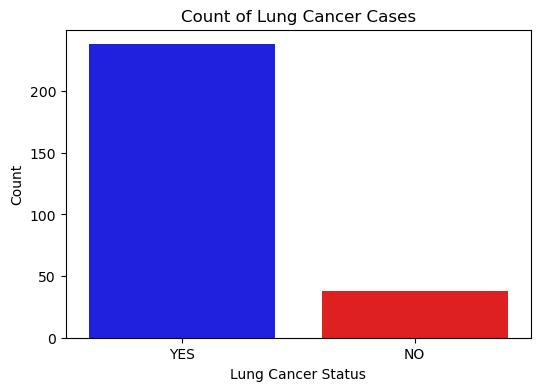

In [28]:
custom_palette = {'YES': 'blue', 'NO': 'red'}  
fig, ax = plt.subplots(figsize=(6, 4))  
sns.countplot(x='LUNG_CANCER', data=df, palette=custom_palette, ax=ax)
ax.set_title('Count of Lung Cancer Cases')
ax.set_xlabel('Lung Cancer Status')
ax.set_ylabel('Count')
plt.show()


#### The below set of charts shows the individual risks factors to develop lung Cancer by the specific variable (risk factor). This will be good to help determine specific variables that have the biggest impact on determining if someone has lung cancer. These are separated by gender to try and find a link between the two.

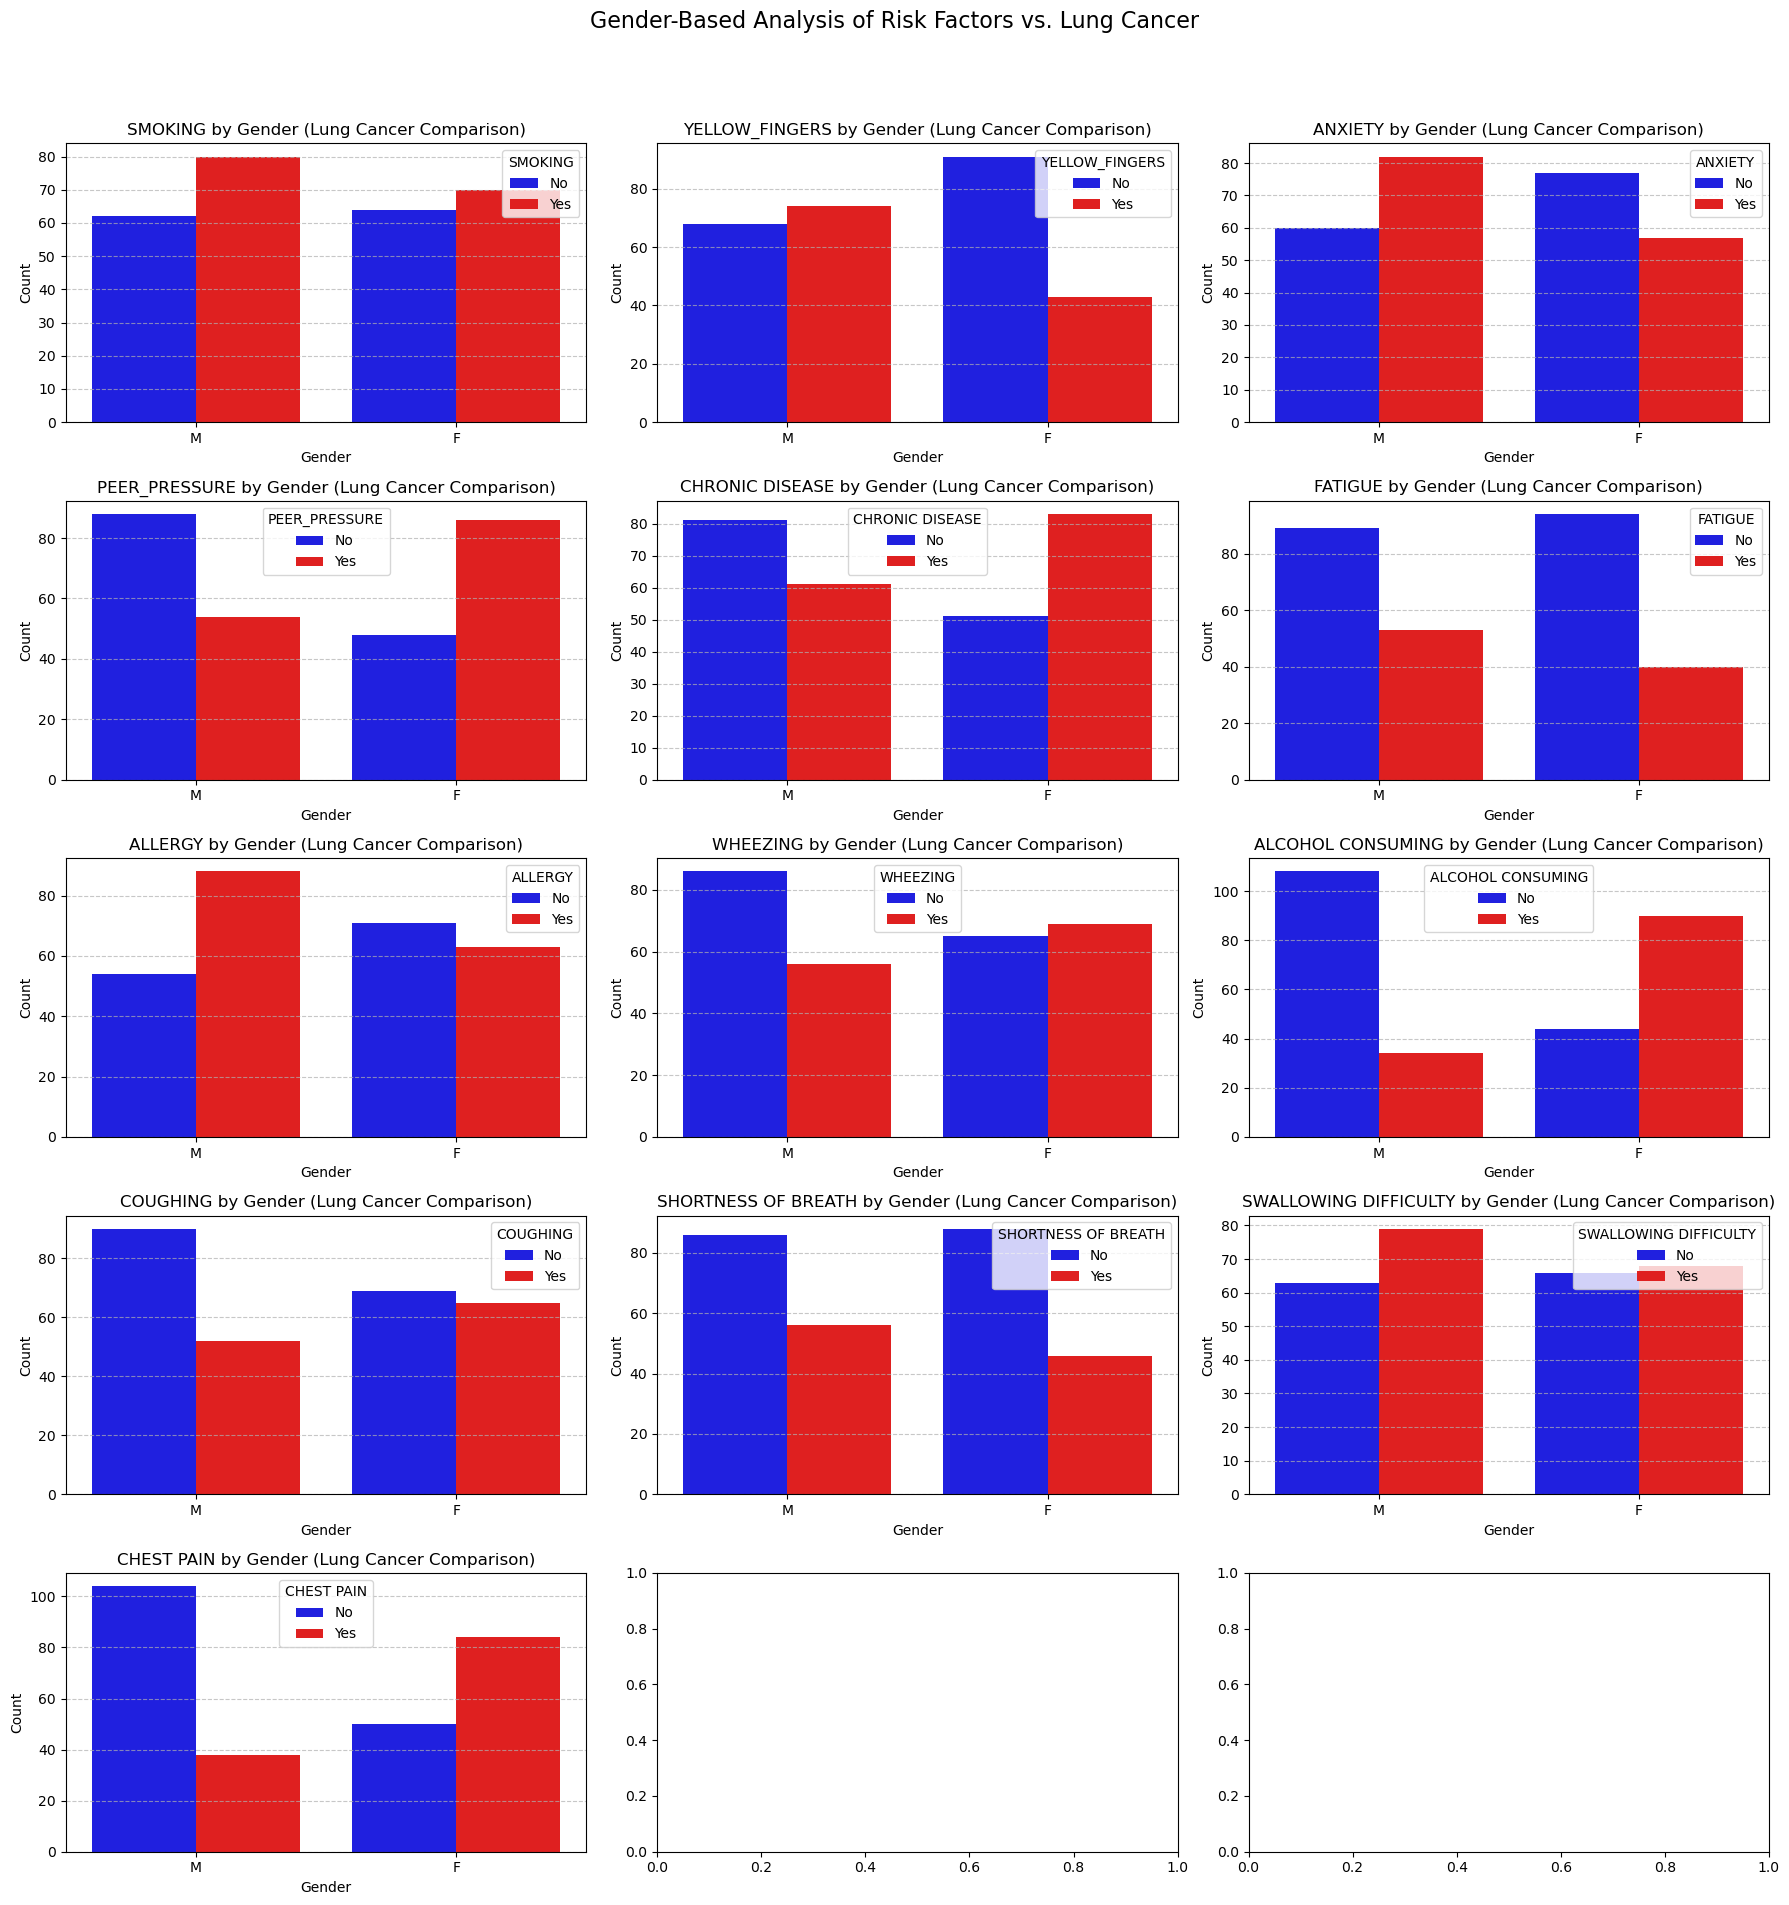

In [30]:
df.columns = df.columns.str.strip()


risk_factors = [
    'SMOKING','YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
    'CHRONIC DISEASE','FATIGUE','ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING',
    'COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN'
]

num_features = len(risk_factors)
rows = (num_features + 2) // 3  

fig, axes = plt.subplots(rows, 3, figsize=(18, 4 * rows))
fig.suptitle("Gender-Based Analysis of Risk Factors vs. Lung Cancer", fontsize=16)
axes = axes.flatten()  

custom_palette = ['blue', 'red']

for i, factor in enumerate(risk_factors):
    sns.countplot(data=df, x='GENDER', hue=factor, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f"{factor} by Gender (Lung Cancer Comparison)")
    axes[i].set_xlabel("Gender")
    axes[i].set_ylabel("Count")
    axes[i].legend(title=factor, labels=["No", "Yes"])
    axes[i].grid(visible=True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



## Observations from Gender-Based Health Analysis

#### General Trends:
- Men tend to have more smoking-related symptoms like <b>yellow fingers, wheezing, and coughing,</b> which could be linked to higher smoking rates.
- <b>Fatigue, chest pain, and chronic diseases </b> appear to be slightly more common in women.

#### Behavioral and Symptom Patterns:
- <b>Yellow Fingers:</b> More men than women report having yellow fingers, which might suggest that men smoke more often.
- <b>Anxiety & Peer Pressure:</b> These seem to be evenly spread between genders, meaning both experience them at similar levels.
- <b>Fatigue:</b> Women report feeling tired more often than men, which could mean they experience or perceive health issues differently.
- <b>Chronic Disease:</b> Both genders report chronic diseases at about the same rate, though women say "YES" slightly more often.
#### Respiratory & Other Health Symptoms:
- <b>Wheezing & Coughing:</b> These symptoms are slightly more common in men, possibly because of higher smoking rates or other lung-related issues.
- <b>Shortness of Breath:</b> Reported at about the same rate by both genders, but slightly more women say "YES."
- <b>Swallowing Difficulty:</b> No big difference between men and women—both report it at similar levels.
- <b>Chest Pain:</b> Women report chest pain more often than men, which might point to differences in how each gender experiences heart or lung problems.

# <u> Modeling</u>

- The Below code is all my modeling for 3 different tests. I decided to use KNN, Naive Bayes, and a Decision Tree. I needed to convert categorical variables into numerical ones, also define what the target variable (LUNG CANCER) was. I also scaled my numerical values to have a mean of 0 and a standard deviation of 1. This helps when using certain modeling techniques from being biased. I used the test size of 70% testing for my dataset.

In [34]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=["LUNG_CANCER"])
y = df["LUNG_CANCER"]

print("Data types after encoding:\n", X.dtypes)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 





Data types after encoding:
 GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
dtype: object


## KNN Modeling

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.22      0.29        27
           1       0.88      0.95      0.92       167

    accuracy                           0.85       194
   macro avg       0.66      0.59      0.60       194
weighted avg       0.82      0.85      0.83       194



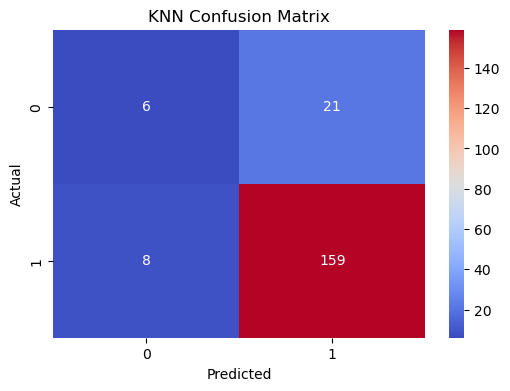

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()



## Gaussian Naive Bayes Modeling

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.59      0.58        27
           1       0.93      0.93      0.93       167

    accuracy                           0.88       194
   macro avg       0.75      0.76      0.76       194
weighted avg       0.88      0.88      0.88       194



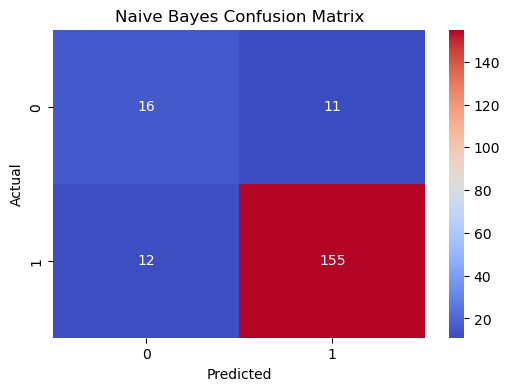

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()



## Decision Tree Modeling

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.30      0.32        27
           1       0.89      0.91      0.90       167

    accuracy                           0.82       194
   macro avg       0.62      0.60      0.61       194
weighted avg       0.81      0.82      0.82       194



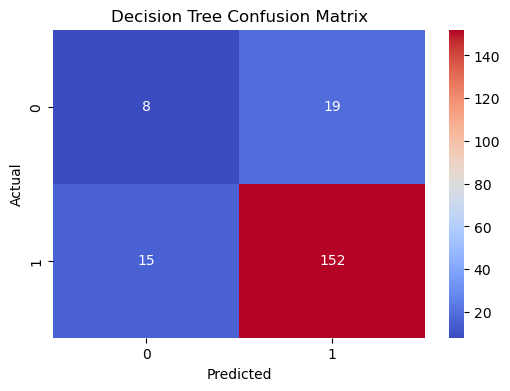

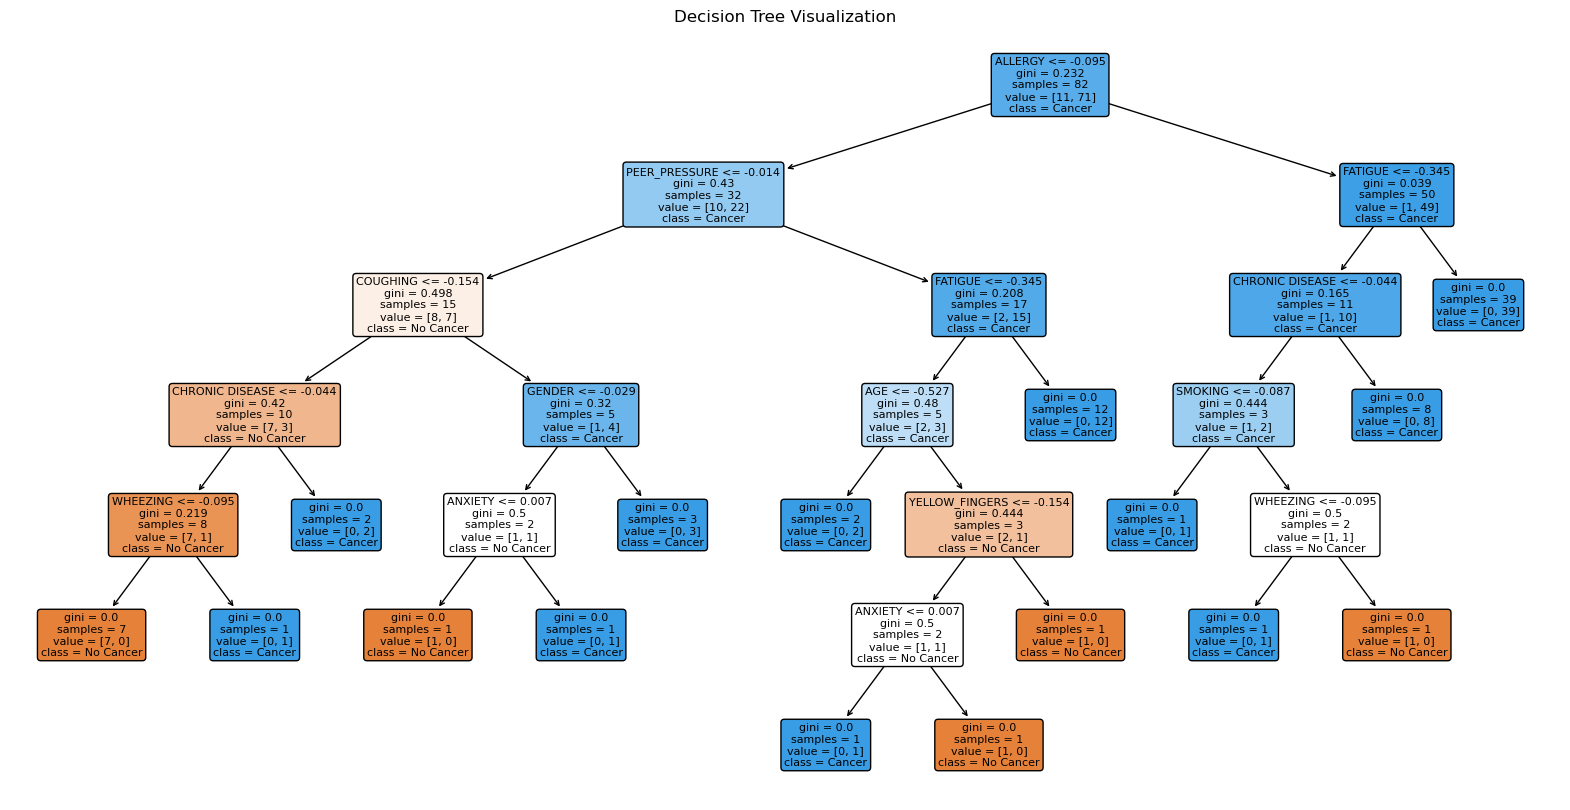

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

feature_names = X.columns.tolist()
plt.figure(figsize=(20, 10))
tree.plot_tree(dt, feature_names=feature_names, class_names=["No Cancer", "Cancer"], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()



# <u> Evaulation </u>

## KNN
- <b> Reason Used: </b> I chose this modeling technique because its easy to understand and implement for my data set. Its one of the best choices to always use in modeling to start out with. It works good with small datasets like the Lung Cancer one I chose for this project.
- <b> Findings: </b> After looking the KNN classification model, it does a decent job with imbalanced dataset that I have. Some key findings with this classification model are that it does a good job on identifying lung cancer cases, but doesn't do a good job on the non-lung cancer cases. It correctly predicted 95% recall on lung cancer cases and 22% on non-lung cancer cases. There was 21 false positives, where the model wrongly classified people having lung cancer when they didn't. Also, it missed 8 actual lung cancer cases that people had, which could be an issue for individuals relying on these models for early diagnosis.
## Naive Bayes
- <b> Reason Used: </b> I chose this modeling technique because its easy to work with when having limited data. It also works well when you have a mix of categorical and numerical categories.
- <b> Findings: </b> For my Naive Bayes model, it did okay with predicting 88% in accuracy of lung cancer cases. However, similar to the KNN model, it was able to detect lung cancer cases better than those that didn't have lung cancer. The model predicted 93% of actual lung cases but only 59% of non-cancer cases. There were 11 false positives, and 12 false negatives, also creating an issue for people that needed to get an early diagnosis prediction. The dataset imbalance makes my predictions not the most accurate.
## Decision Tree 
- <b> Reason Used: </b> I chose this modeling technique because it has a clear flow of how certain variables interact and affect the questions I am trying to answer. Also, it works well when there is an imbalanced data set like the one I chose for this project.
- <b> Findings: </b> T-he decision tree model achieved an accuracy of 82% making it a decent model to use when predicting overall lung cancer cases. It was able to predict 91% in actual lung cancer cases for recall. However, like the previous models it had 19 false positives and 15 false negatives in its prediction. 

- <b> Final Notes</b> The data imbalance in this dataset doesn't help in predicting the non-cancer cases linked to lung cancer. It however, does a good job in predicting lung cancer chances overall in all the models.

# <u> Storytelling</u>
 
- Lung cancer in today's society remains one of the leading causes of death in the world. Being able to detect this disease early plays a big role in survivability and beating it. In this project, my goal was to develop using classification modeling to help predict lung cancer. Using a wide arrange of variables such a smoking habits, symptoms, and other health related conditions, we would hopefully be able to find/predict if someone would have lung cancer. I analyzed factors, hoping to find patterns that could identify which factors are the most likely to attribute to having lung cancer and other ones that didn't utilizing the dataset I chose.

- After looking over the dataset and modeling, I determined that smoking, chronic disease, and wheezing were among the strongest indicators of lung cancer. However, we also noticed that peer pressure and anxiety could also have a moderate link to developing lung cancer. Specific lifestyle choices could definitely lead to getting. Also, the factors that was determined to have the least to predict lung cancer was allergy and swallowing.

- I wanted to see how gender also related to developing lung cancer. After looking at the data set, men had a higher likelihood of developing lung cancer than women. This could be linked to lifestyle choices and factors that each gender usually align too. 

- Ultimately, this project highlights the importance of preventative healthcare and lifestyle choices. If individuals at high risk can be identified early, they may take proactive steps to change their habits, seek medical evaluations, and improve their chances of early detection. The insights gained through this classification model could be further looked at with a even larger dataset.

# <u> Impacts</u>
- One of the biggest challenges I ran into in this project was dealing with dataset imbalance, which really affected how reliable the predictions were. In my dataset, there were way more people diagnosed with lung cancer than those without it. This made the model more likely to predict that someone had lung cancer, just because it had more data of those cases. When working with imbalanced datasets like this, a model might seem to have really high accuracy, but it can actually struggle with correctly identifying the smaller group. In this case, if my model just predicted "Lung Cancer = Yes" most of the time, it might look like it was working well, but in reality, it wouldn’t be useful in a real-world setting where the cases are more balanced.

- This imbalance also made false positives and false negatives a big concern of mine. A false positive happens when someone is wrongly predicted to have lung cancer, which could lead to unnecessary stress, medical tests, and expenses on the indivudal thats getting them done. A false negative is even worse—it means that someone who actually has lung cancer is misclassified as not having it. That could delay important treatment and put their health at serious risk. To prevent this kind of issue, I could try techniques like oversampling the minority class (using SMOTE) or adjusting the model to focus more on correctly identifying the smaller group. These techniques could help make future versions of this project more balanced and reliable.
- Overall, this project was a little harder for me. I think looking into the dataset and understanding exactly what it was trying to say was challenging for me. I think with more time and practice that it will be easier as the semester continues. Learning new tricks and ways to sort through data, understanding the dataset, and providing better insight will be key as we move foward.

# <u> References</u>

- Dataset Link <url> https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer/data</url>
- Comparison Of Methods <url>https://ocw.mit.edu/courses/15-062-data-mining-spring-2003/pages/lecture-notes/</url>
- KNN Video <url> https://www.youtube.com/watch?v=HVXime0nQeI&themeRefresh=1</url>
- Naive Bayes Video <url> https://www.youtube.com/watch?v=O2L2Uv9pdDA </url>
- Decision Trees Vide <url> https://www.youtube.com/watch?v=_L39rN6gz7Y </url>
- Various Documents on Canvas
